<a href="https://colab.research.google.com/github/MidoriTinto/Python_Fundamentals/blob/main/Copy_of_8_2_Correlation_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively
---
This worksheet has a set of exercises for practising using the linregress function.  The function will run a linear regression algorithm (or model) to produce data that can be used for predictions.

### Exercise 1 - Clean the data 
---
Using the positive psychology dataset - "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
* Read the data and display info 
* Visually check the summary to see which columns have null values
* Remove columns with a significant number of null values

**Expected Output**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
```

In [1]:
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
language_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB


### Exercise 2 - Check for outliers 
---
We briefly mentioned outliers in the R and stats presentation. An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results. 

A value is considered to be an outlier if it is any of:
*  greater than `Q3 + 1.5 * interquartile_range`
*  less than `Q1 - 1.5 * interquartile_range`
*  more than 2 standard deviations from the mean

Q3 = value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot, in which:

*  the upper line on the boxplots arm (whisker) is `Q3 + 1.5 * IQR`
*  the lower line on the boxplots arm (whisker) is `Q1 - 1.5 * IQR`
*  the middle line of the box is the median
*  the top of the box is Q3
*  the bottom of the box is Q1
*  outliers are shown as circles or dots, either above or below the whiskers

1. Using either matplotlib or Seaborn, create a boxplot of `Wellbeing` and a separate boxplot of `selfesteem`
2. use `plt.show()` to separate the graphs 
3. Can you see any outliers? Are they high or low?

**Expected Output**

https://docs.google.com/presentation/d/e/2PACX-1vQBji5MrvtdeXCtP2PJzhPLKqXXuLMYjy4nCIzXpJLoye38IzetN5amZd6pU9e4io3bTUvE6Slg_hIk/pub?start=false&loop=false&delayms=3000


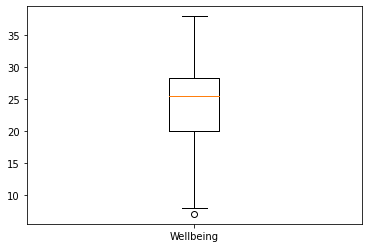

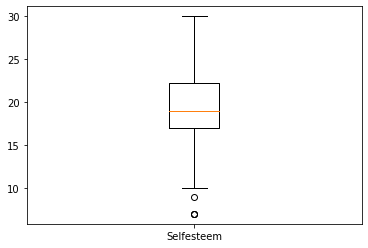

In [ ]:
import matplotlib.pyplot as plt

wellbeing=language_drop["Wellbeing"]
#wellbeing
labels=["Wellbeing"]
#labels
plt.boxplot(wellbeing, labels=labels)
plt.show()

wellbeing=language_drop["selfesteem"]
#wellbeing
labels=["Selfesteem"]
#labels
plt.boxplot(wellbeing, labels=labels)
plt.show()



Because of the whiskers being long in both sets of data outliers can be expected.

### Exercise 3 - Removing outliers
---
Create a function called `remove_outliers(df, column)` to remove outliers from a given column in a given dataframe.  Use the function to remove outliers from the `Wellbeing` column.  Then use the function to remove the outliers from the `selfesteem` columns. 

The function will:

1. Store the values for Q1 and Q3 in 2 separate variables   *Hint: you can use `.quantile(0.75)` and `.quantile(0.25)` to get Q3 and Q1 respectively*  
2. Calculate the interquartile range(IQR) using `Q3` - `Q1`  
3. Create a variable which will store the value for the `upper_limit` (`Q3 + 1.5 * IQR`)  
4. Create another variable which assigns the value for the `lower_limit` (`Q1  - 1.5 * IQR`)  
5. Filter all rows where values are NOT outliers into a new dataframe called `df_normal`
6. Return `df_normal`

Run the function twice, once for each column.
Show the info for the resulting dataframe

**Test output**:  
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          41 non-null     int64  
 1   English      41 non-null     object 
 2   sex          41 non-null     object 
 3   origin       41 non-null     object 
 4   Ukresidence  41 non-null     float64
 5   MAAS         41 non-null     float64
 6   Resilliance  41 non-null     int64  
 7   Wellbeing    41 non-null     int64  
 8   Stress       41 non-null     int64  
 9   selfesteem   41 non-null     int64  
 10  LoC          41 non-null     int64  
 11  sleep        41 non-null     int64  
 12  Year         41 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.5+ KB
```


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage was dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info() # to check column has been dropped


column="selfesteem", "Wellbeing"

def remove_outliers():

  wellbeingQ1=language_drop["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=language_drop["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit=wellbeingQ3 + 1.5 * IQR #defining upper and lower limit
  lower_limit=wellbeingQ1 - 1.5 * IQR

  df_normal=language_drop[(language_drop["Wellbeing"] > (lower_limit)) & (language_drop["Wellbeing"] < (upper_limit))]#dataframe after dropping null values from column Wellbeing

  return df_normal.info()


remove_outliers()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          43 non-null     int64  
 1   English      43 non-null     object 
 2   sex          43 non-null     object 
 3   origin       43 non-null     object 
 4   Ukresidence  43 non-null     float64
 5   MAAS         43 non-null     float64
 6   Resilliance  43 non-null     int64  
 7   Wellbeing    43 non-null     int64  
 8   Stress       43 non-null     int64  
 9   selfesteem   43 non-null     int64  
 10  LoC          43 non-null     int64  
 11  sleep        43 non-null     int64  
 12  Year         43 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.7+ KB


Exercise above, outliers have been removed in column WELLBEING ONLY...hence 43 non-null instead of the expected 41

The Code Cell below shows outliers eliminated in columns Wellbeing and Selfesteem simultaneously (look at df_normal). This seems to be causing issues since 40 non-null are eliminated instead of the 41 expected (see expected output). It seems that by doing it this way a value extra is eliminated from column Wellbeing.Hence 40 and not 41.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


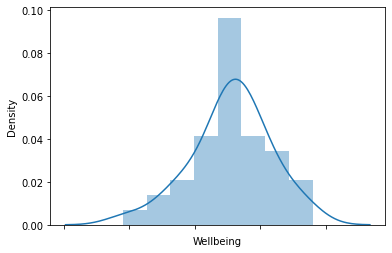

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop
#column="selfesteem", "Wellbeing"

def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2

  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  #df_normal contains all columns apart from "firstlanguage" and all null values have been dropped in both column Wellbeing and selfesteem simultaneously

  #return df_normal.info()
 
  #checking for normality
  wellbeing=df_normal["Wellbeing"]
  #wellbeing
  labels=["Wellbeing"]
  #labels
  chart=sns.distplot(df_normal["Wellbeing"])
  chart.set_xticklabels(labels)
  chart

remove_outliers()

In [ ]:
#LILA's CODE VERs.1 showing that when outliers are removed first in one column and then in the other column the result is as expected
import pandas as pd
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)
def remove_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  upper = q3 + 1.5*iqr
  lower = q1-1.5*iqr
  df_normal = df[(df[column] < upper) & (df[column] > lower)]
  return df_normal
wellbeing_outliers_removed = remove_outliers(df, "Wellbeing")
df_no_outliers = remove_outliers(wellbeing_outliers_removed, "selfesteem")

df_no_outliers.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41 non-null     int64  
 1   English        41 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            41 non-null     object 
 4   origin         41 non-null     object 
 5   Ukresidence    41 non-null     float64
 6   MAAS           41 non-null     float64
 7   Resilliance    41 non-null     int64  
 8   Wellbeing      41 non-null     int64  
 9   Stress         41 non-null     int64  
 10  selfesteem     41 non-null     int64  
 11  LoC            41 non-null     int64  
 12  sleep          41 non-null     int64  
 13  Year           41 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


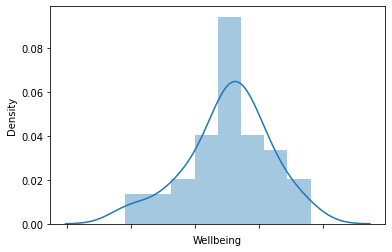

In [ ]:
import seaborn as sns
#checking for normality LILA's code Vers.1
wellbeing=df_no_outliers["Wellbeing"]
  #wellbeing
labels=["Wellbeing"]
  #labels
chart=sns.distplot(df_no_outliers["Wellbeing"])
chart.set_xticklabels(labels)
chart


In [ ]:
#LILA's CODE VERS. 2 - replicating what I did on exercise 3 i.e removing outliers in both columns simultaneously, results is then also 40 non-null
def remove_outliers2():
  q1_w = df["Wellbeing"].quantile(0.25)
  q3_w = df["Wellbeing"].quantile(0.75)
  iqr_w = q3_w-q1_w
  upper_w = q3_w + 1.5*iqr_w
  lower_w = q1_w-1.5*iqr_w
  q1_s = df["selfesteem"].quantile(0.25)
  q3_s = df["selfesteem"].quantile(0.75)
  iqr_s = q3_s-q1_s
  upper_s = q3_s + 1.5*iqr_s
  lower_s = q1_s-1.5*iqr_s
  df_normal2 = df[((df["Wellbeing"] < upper_w) & (df["Wellbeing"] > lower_w)) & ((df["selfesteem"] < upper_s)& (df["selfesteem"]>lower_s))]
  return df_normal2.info()
  
remove_outliers2()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            40 non-null     int64  
 1   English        40 non-null     object 
 2   firstlanguage  17 non-null     object 
 3   sex            40 non-null     object 
 4   origin         40 non-null     object 
 5   Ukresidence    40 non-null     float64
 6   MAAS           40 non-null     float64
 7   Resilliance    40 non-null     int64  
 8   Wellbeing      40 non-null     int64  
 9   Stress         40 non-null     int64  
 10  selfesteem     40 non-null     int64  
 11  LoC            40 non-null     int64  
 12  sleep          40 non-null     int64  
 13  Year           40 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


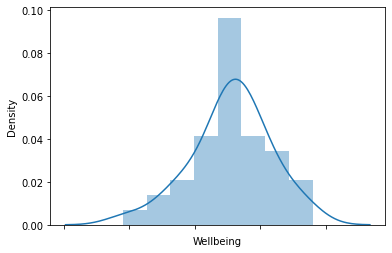

In [ ]:
#Looking at the normality of the data - Lila's code vers.1
import seaborn as sns
q1_w = df["Wellbeing"].quantile(0.25)
q3_w = df["Wellbeing"].quantile(0.75)
iqr_w = q3_w-q1_w
upper_w = q3_w + 1.5*iqr_w
lower_w = q1_w-1.5*iqr_w
q1_s = df["selfesteem"].quantile(0.25)
q3_s = df["selfesteem"].quantile(0.75)
iqr_s = q3_s-q1_s
upper_s = q3_s + 1.5*iqr_s
lower_s = q1_s-1.5*iqr_s
df_normal2 = df[((df["Wellbeing"] < upper_w) & (df["Wellbeing"] > lower_w)) & ((df["selfesteem"] < upper_s)& (df["selfesteem"]>lower_s))]
wellbeing=df_normal2["Wellbeing"]
#wellbeing
labels=["Wellbeing"]
  #labels
chart=sns.distplot(df_normal2["Wellbeing"])
chart.set_xticklabels(labels)
chart



### Exercise 4 - Checking for normality
---

Linear regressions assume that the data is normally distributed (Gaussian) and therefore has the bell curved shape and a similar mean and median (this would be true if the mean was centred like it is in Gaussian data). 

1. Use Seaborn's **distplot** to check the shape of the `Wellbeing` and `selfesteem` columns.  Do they look normally distributed (Gaussian)?

`sns.distplot(dataframe['column'])`

*Hint: if you add, `bins= ...` as a parameter, you can set the number of bins (bars) in your chart*

2. Compare the mean and median of `Wellbeing` - are they similar? 
3. Compare the mean and median of `selfesteem` - are they similar?





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


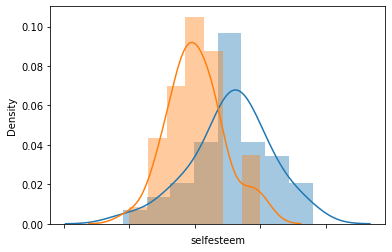

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop
#column="selfesteem", "Wellbeing"

def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2

  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]


  #return df_normal.info()

  wellbeing=df_normal["Wellbeing"]
  #wellbeing
  labels=["Wellbeing"]
  #labels
  chart=sns.distplot(df_normal["Wellbeing"])
  chart.set_xticklabels(labels)
  chart

  wellbeing=df_normal["selfesteem"]
  #wellbeing
  labels=["selfesteem"]
  #labels
  chart=sns.distplot(df_normal["selfesteem"])
  chart.set_xticklabels(labels)
  chart

remove_outliers()
#sns.distplot(dataframe['column'])

### Exercise 5 - Check which variables are most highly correlated
---
Using the `dataframe.corr()` function and Seaborn's heatmap, create a correlation heatmap matrix to check which variables are most highly correlated.

A correlation matrix finds the correlation coefficient between every variable pair combination in a set of variables.  A correlation heatmap shows the degree of correlation between variables using a colour scale.

*The matrix and heatmap will always show the correlation coefficients between each variable and itself, which will have a correlation coefficient of 1.*
  
Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated


Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated

1. create the correlation matrix assigning it to a variable called **correlation_matrix** using the .corr() function and rounding to 2 decimal places:

  `correlation_matrix = dataframe.corr().round(2)`

*This will create a matrix similar to the linear regression matrix created in the numpy worksheet, but with more than two variables.*

2. create a heatmap of the correlation matrix using:

 `sns.heatmap(data=data_variable, annot=True)`

*Hint: Use `annot = True` to print the correlation values inside the square*

3. Which variables are the most highly correlated with each other (closest to 1 or -1)?

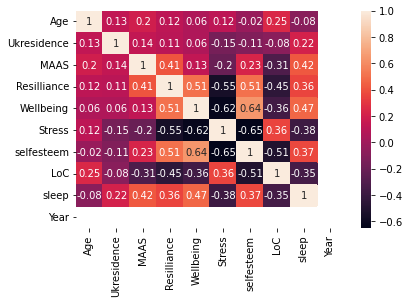

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop
#column="selfesteem", "Wellbeing"

def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  
  correlation_matrix=df_normal.corr().round(2)
  sns.heatmap(data=correlation_matrix, annot=True)

remove_outliers()

Variable most correlated with each other:
Wellbeing - Selfesteem (positive corr 0.64)
Stress-Wellbeing (negative -0.62)
Selfesteem - Stress (negative - 0.65)
Stress - Resiliance (negative -0.55)

### Exercise 6 - Linear regression 
---
Using the `linregress` function, perform a linear regression on the Wellbeing and selfesteem columns   
To do this:

1. `from scipy.stats import linregress`
2. create a variable 'x' which stores the Wellbeing column
3. create a variable 'y' which stores the selfesteem column
4. create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
5. display the regression
6. display the slope (regression.slope)
7. display the y-intercept
8. display the r^2 value (rvalue**2)
9. display the pvalue 


In [ ]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop
#column="selfesteem", "Wellbeing"

def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  

  x=df_normal["Wellbeing"]
  y=df_normal["selfesteem"]

  regression=linregress(x,y)
  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)

remove_outliers()


LinregressResult(slope=0.4548393197957324, intercept=8.565226362213933, rvalue=0.6420102771261641, pvalue=7.99794978586635e-06, stderr=0.08811451151517669) 
 slope: 0.4548393197957324 
 r square: 0.6420102771261641 
 y-intercept: 8.565226362213933 
 p value= 7.99794978586635e-06


### Exercise 7 - understanding the output 
---
The r^2 value (rvalue**2) helps us understand how much our independent variable (x) is predicting our dependent variable (y). The closer to 1 the rvalue is the more  the change in Y is explained by X. So an rvalue of 0.7 means that 70% of Y's variance can be explained by X. 

Our pvalue shows how significant our model is, if the pvalue is < 0.05 then the model is significant. 

On this basis, write below the findings of the above regression.
* is the model significant?
* how much is the change in y explained by x? 

**Write about the findings here**: The change in y (self esteem) explained by x (wellbeing) is given by the  slope which in this case is positive (slope=0.454, r=0.64)and shows a positive correlation. The correlation between wellbeing and self esteem is significant as shown by the p<0.05 (p=7.99794978586635e-06).

### Exercise 8 - Linear regression with other variables 
---

Referring back to the correlation heatmap..  
*  Repeat Exercise 6 but with the variables that were the most highly correlated according to the heatmap.   
* write a comment comparing the results of this regression with the one you created in exercise 6

In [ ]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop


def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  

  x=df_normal["Wellbeing"]
  y=df_normal["Resilliance"]

  regression=linregress(x,y)

  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)
remove_outliers()

LinregressResult(slope=0.51761550232982, intercept=22.187864303031343, rvalue=0.5056502920089705, pvalue=0.0008736353489593725, stderr=0.1432664208945804) 
 slope: 0.51761550232982 
 r square: 0.5056502920089705 
 y-intercept: 22.187864303031343 
 p value= 0.0008736353489593725


In [ ]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop


def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  

  x=df_normal["selfesteem"]
  y=df_normal["Stress"]

  regression=linregress(x,y)

  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)
remove_outliers()

LinregressResult(slope=-1.161453872769004, intercept=44.232331883114654, rvalue=-0.6547457501063074, pvalue=4.5727891714734265e-06, stderr=0.21750669720833493) 
 slope: -1.161453872769004 
 r square: -0.6547457501063074 
 y-intercept: 44.232331883114654 
 p value= 4.5727891714734265e-06


In [ ]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop


def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  

  x=df_normal["Stress"]
  y=df_normal["Wellbeing"]

  regression=linregress(x,y)

  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)
remove_outliers()

LinregressResult(slope=-0.4946002438599547, intercept=35.81268507228705, rvalue=-0.6215837119476934, pvalue=1.8625416061211117e-05, stderr=0.10111544548700478) 
 slope: -0.4946002438599547 
 r square: -0.6215837119476934 
 y-intercept: 35.81268507228705 
 p value= 1.8625416061211117e-05


**Comment here**: For practice sake I picked another three variables which according to the heatmap were as correlated as Wellbeing is to Self esteem These were:

1.   Wellbeing-Resiliance (rsqr=0.51)
2.   Selfesteem-Stress (rsqr=-0.65)

1.   Stress-Wellbeing (rsqr=-0.621)

A linear regression done on the variables mentioned above showed a significant correlation between them (pvalue<0.05). For comparison against the correlation between Wellbeing and self esteem (exercise 6) the negative correlation with the negative value farthest from 1 was chosen(Selfesteem - Stress, r=-065). The slope in this correlation tells us that self esteem may be affected by stress levels (slope=-1.161). The correlation seen between these variables is significant (p<0.05). 
Looking at the positive correlation between Wellbeing and Selfesteem (rvalue=0.642) it could be say that self esteem levels may be sligthly affected by wellbeing (slope=0.642). The correlation between these two variable was significant (p<0.05). In summary, these data may tell us that Stress and Wellbeing may play an important role in the self esteem of a person. 





### Exercise 9 - Plotting a line of best fit 
---
To create a line of best fit we use y = slope\*x + intercept. 

Using matplotlib (dont forget to import it):

* create a scatter graph between Wellbeing and selfesteem 
* plot a line of best fit using the results in exercise 6  (y = slope * x + intercept)  

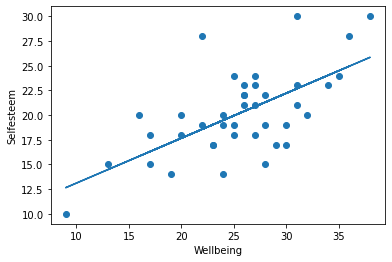

LinregressResult(slope=0.4548393197957324, intercept=8.565226362213933, rvalue=0.6420102771261641, pvalue=7.99794978586635e-06, stderr=0.08811451151517669) 
 slope: 0.4548393197957324 
 r square: 0.6420102771261641 
 y-intercept: 8.565226362213933 
 p value= 7.99794978586635e-06


In [ ]:
from scipy.stats import linregress
#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop


def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  

  x=df_normal["Wellbeing"]
  y=df_normal["selfesteem"]
  plt.scatter(x,y)
  regression=linregress(x,y)
  slope=regression.slope
  intercept = regression.intercept


  #y=slope*x+intercept
  plt.plot(x, slope*x + intercept)#PLOT LINE REGRESSION


  plt.xlabel('Wellbeing')#ADD LABELS
  plt.ylabel('Selfesteem')
  plt.show()

  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)
remove_outliers()


### Exercise 10 - using Seaborn to plot a regression line 
---

Use Seaborn's `regplot` function to create a scatter graph with line of best fit of the variables you used in Exercise 8.

* Compare the 'Wellbeing' and 'selfesteem' graph to the graph you created in Exercise 9

LinregressResult(slope=-1.161453872769004, intercept=44.232331883114654, rvalue=-0.6547457501063074, pvalue=4.5727891714734265e-06, stderr=0.21750669720833493) 
 slope: -1.161453872769004 
 r square: -0.6547457501063074 
 y-intercept: 44.232331883114654 
 p value= 4.5727891714734265e-06


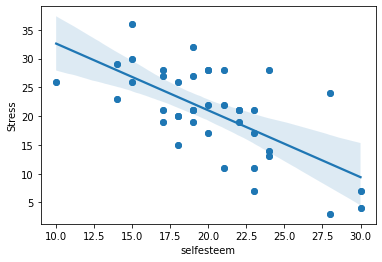

In [ ]:
from scipy.stats import linregress
import seaborn as sns
#import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych=pd.read_csv(url)
#psych
#firstlanguage has to be dropped because of null values
language_drop=psych.drop(columns=['firstlanguage'], axis=0)
#language_drop.info()

df=language_drop


def remove_outliers():
  #removing outliers on wellbeing column
  wellbeingQ1=df["Wellbeing"].quantile(0.25)#need to specify the column otherwise the whole dataframe is affected
  wellbeingQ3=df["Wellbeing"].quantile(0.75)
  IQR=wellbeingQ3-wellbeingQ1

  upper_limit_w =wellbeingQ3 + 1.5 * IQR
  lower_limit_w =wellbeingQ1 - 1.5 * IQR

  #removign outliers on selfesteem column
  selfesteemQ1=df["selfesteem"].quantile(0.25)
  selfesteemQ3=df["selfesteem"].quantile(0.75)
  IQR2=selfesteemQ3-selfesteemQ1

  lower_limit =selfesteemQ1 - 1.5 * IQR2
  upper_limit =selfesteemQ3 + 1.5 * IQR2
  df_normal=df[(df["Wellbeing"] > (lower_limit_w)) & (df["Wellbeing"] < (upper_limit_w)) & (df["selfesteem"] > (lower_limit)) & (df["selfesteem"] < (upper_limit)) ]
  

  x=df_normal["selfesteem"]
  y=df_normal["Stress"]
  plt.scatter(x,y)
  regression=linregress(x,y)
  slope=regression.slope
  intercept = regression.intercept

#chart=sns.scatterplot(x=x,y=y)#normal scatterplot
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('selfesteem')
  chart.set_ylabel('Stress')
  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)
remove_outliers()